# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
-0.001
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.001
0.0
-0.002
-0.002
-0.004
-0.003
-0.001
0.0
-0.003
-0.004
0.997
1.002
1.002
1.0
1.0
2.006
2.006
2.003
2.002
2.002
2.977
2.981
2.982
2.982
2.981
3.973
3.973
3.972
3.971
4.97
4.975
4.975
4.974
4.974
5.979
5.979
5.976
5.977
6.843
6.843
6.842
6.842
7.682
7.682
7.681
7.681
8.684
8.684
8.683
8.682
9.685
9.685
9.683
9.683
10.657
10.662
10.662
10.661
10.661
11.637
11.642
11.642
11.642
11.642
12.614
12.619
12.619
12.617
12.617
13.59
13.596
13.596
13.594
13.593
14.17
14.176
14.176
14.175
14.175
14.749
14.755
14.754
14.752
14.754
15.755
15.755
15.754
15.754
16.728
16.727
16.726
16.725
17.697
17.697
17.695
17.695
18.672
18.672
18.672
18.669
19.637
19.642
19.642
19.641
19.64
20.645
20.644
20.642
20.642
21.35
21.349
21.348
21.348
22.056
22.055
22.053
22.053
23.061
23.06
23.057
23.057
24.063
24.063
24.06
24.061
25.061
25.061
25.064
25.065
26.069
26.069
26.06

56.533
56.533
56.533
56.532
56.532
56.533
56.533
56.532
56.532
56.532
56.532
56.532
56.531
56.53
56.53
56.529
56.529
56.529
56.529
56.529
56.529
56.528
56.528
56.528
56.528
56.527
56.527
56.527
56.527
56.527
56.527
56.528
56.528
56.529
56.529
56.529
56.528
56.526
56.526
56.525
56.526
56.526
56.526
56.563
56.604
56.643
56.643
56.683
56.683
56.683
56.718
56.718
56.718
56.718
56.718
56.718
56.735
56.734
56.734
56.733
56.733
56.733
56.733
56.733
56.734
56.735
56.734
56.734
56.733
56.733
56.732
56.732
56.732
56.733
56.732
56.732
56.732
56.732
56.732
56.73
56.73
56.73
56.73
56.73
56.729
56.729
56.729
56.73
56.73
56.73
56.729
56.729
56.729
56.73
56.73
56.73
56.728
56.728
56.727
56.728
56.727
56.766
56.809
56.809
56.854
56.897
56.897
56.897
56.896
56.896
56.896
56.896
56.896
56.922
56.922
56.923
56.922
56.922
56.921
56.921
56.921
56.92
56.921
56.921
56.921
56.92
56.92
56.919
56.919
56.919
56.919
56.919
56.919
56.918
56.918
56.917
56.919
56.919
56.92
56.919
56.917
56.916
56.915
56.915
56.915
56

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,-0.001
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1613,3226,59.106
1614,3228,59.106
1615,3230,59.105
1616,3232,59.105


<IPython.core.display.Javascript object>


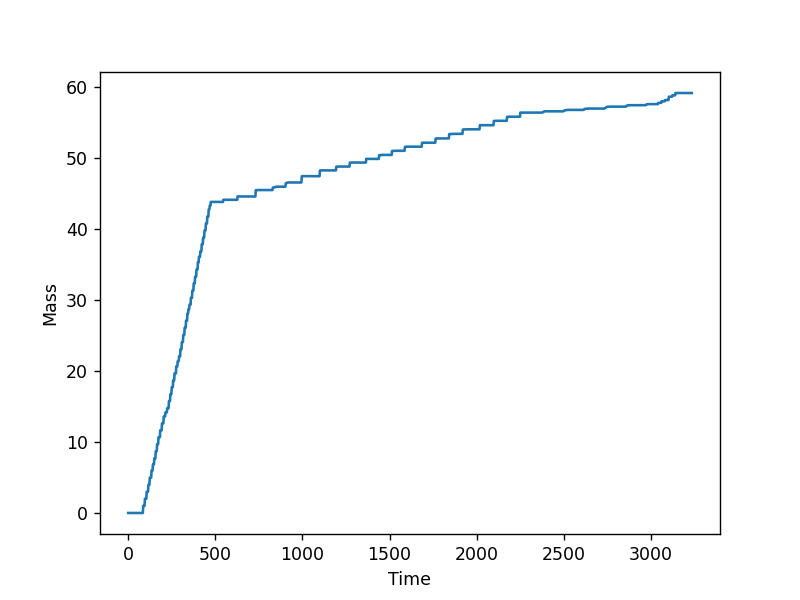

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_170423_S307-312.csv')